<a href="https://colab.research.google.com/github/vitormanjos/testsprojects/blob/main/random_matplotlib_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  corredores  Volta1  Volta2  Volta3  Volta4  Volta5  Volta6  Volta7  Volta8  \
0    Everton    4.87    2.88    2.86    1.65    9.15    9.06    9.88    8.77   
1   Weverton    6.76    8.54    9.21    7.94    3.19    9.31    4.39    8.74   
2    Ederson    2.75    5.31    8.03    9.60    3.36    6.50    8.33    3.05   
3      Edson    3.66    2.76    2.10    1.52    2.23    1.80    4.88    1.35   
4     Hudson    7.64    3.52    5.30    8.65    2.34    8.72    9.27    2.36   
5     Madson    5.34    9.87    6.12    1.30    3.17    5.81    2.53    7.62   

   Volta9  Volta10  Média todas as voltas  Melhor Volta  
0    5.82     1.08                  5.602          1.08  
1    4.66     5.72                  6.846          3.19  
2    7.82     1.51                  5.626          1.51  
3    8.17     4.75                  3.322          1.35  
4    2.25     3.69                  5.374          2.25  
5    1.59     3.62                  4.697          1.30  


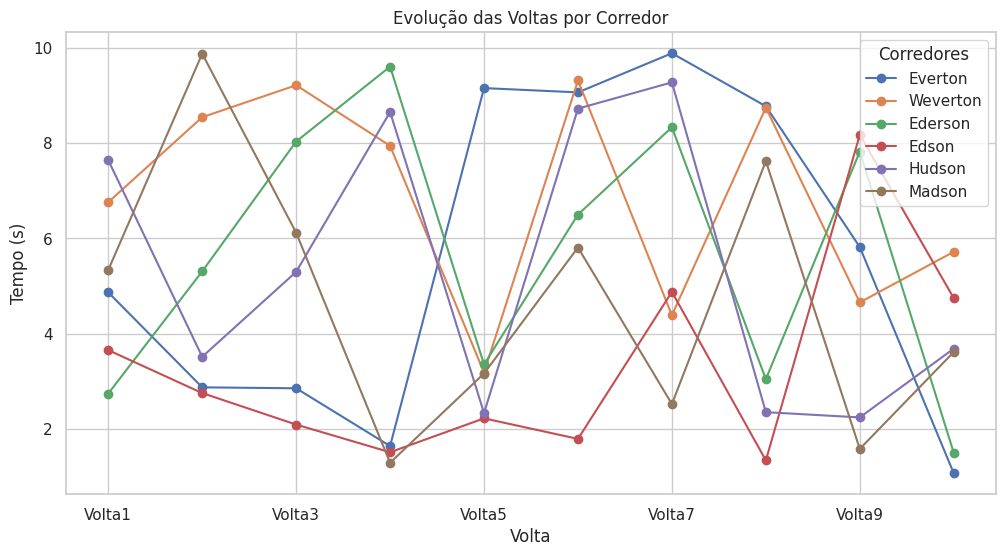

<ipython-input-5-46aed43a54fa>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corredores', y='Melhor Volta', data=df1, palette='viridis')


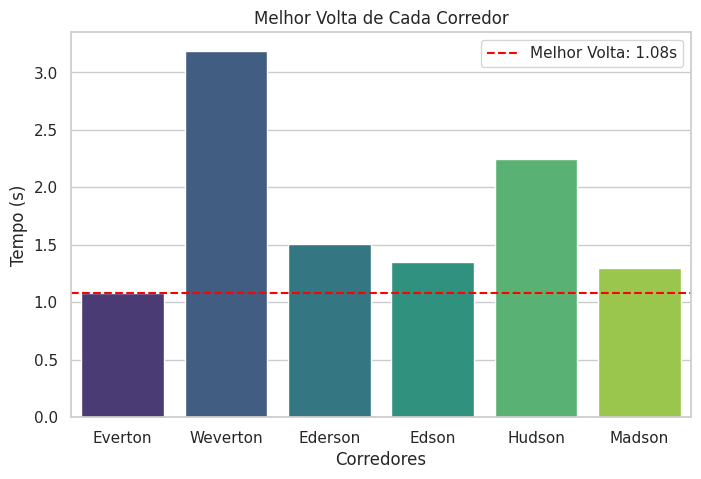

<ipython-input-5-46aed43a54fa>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corredores', y='Média todas as voltas', data=df1, palette='coolwarm')


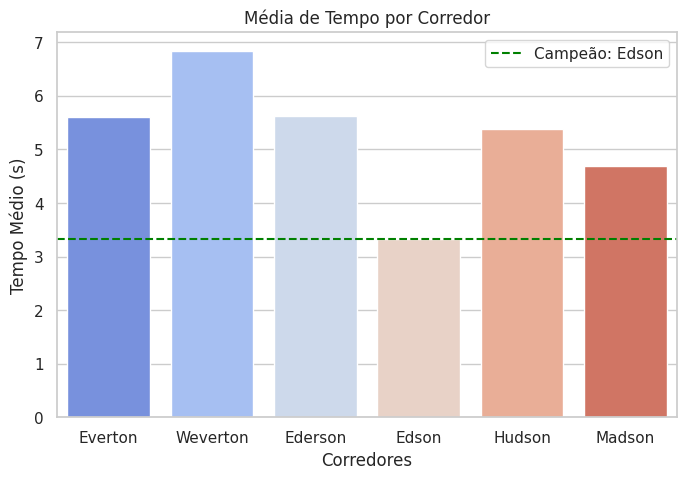


A melhor volta foi feita no tempo de 1.08s pelo corredor(a) Everton

Em ordem crescente de posição fica:
['Edson', 'Madson', 'Hudson', 'Everton', 'Ederson', 'Weverton']

O campeão é Edson com a menor média de tempo entre as voltas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corredores = ['Everton', 'Weverton', 'Ederson', 'Edson', 'Hudson', 'Madson']
df1 = pd.DataFrame({'corredores': corredores})

voltas = np.round(np.random.uniform(1.0, 10.0, size=(len(corredores), 10)), 2)
voltas_df = pd.DataFrame(voltas, columns=[f'Volta{i+1}' for i in range(10)])

df1 = pd.concat([df1, voltas_df], axis=1)

df1['Média todas as voltas'] = df1.iloc[:, 1:11].mean(axis=1)
df1['Melhor Volta'] = df1.iloc[:, 1:11].min(axis=1)

menor_melhor_volta = df1['Melhor Volta'].min()
menor_campeao = df1['Média todas as voltas'].min()
corredor_melhor_volta = df1.loc[df1['Melhor Volta'] == menor_melhor_volta, 'corredores'].values[0]
campeao = df1.loc[df1['Média todas as voltas'] == menor_campeao, 'corredores'].values[0]

print(df1)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
df1.set_index('corredores').iloc[:, :10].T.plot(ax=plt.gca(), marker='o')

plt.title('Evolução das Voltas por Corredor')
plt.xlabel('Volta')
plt.ylabel('Tempo (s)')
plt.legend(title='Corredores')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='corredores', y='Melhor Volta', data=df1, palette='viridis')
plt.title('Melhor Volta de Cada Corredor')
plt.ylabel('Tempo (s)')
plt.xlabel('Corredores')

plt.axhline(y=menor_melhor_volta, color='red', linestyle='--', label=f'Melhor Volta: {menor_melhor_volta}s')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='corredores', y='Média todas as voltas', data=df1, palette='coolwarm')
plt.title('Média de Tempo por Corredor')
plt.ylabel('Tempo Médio (s)')
plt.xlabel('Corredores')

plt.axhline(y=menor_campeao, color='green', linestyle='--', label=f'Campeão: {campeao}')
plt.legend()
plt.show()

print('\nA melhor volta foi feita no tempo de', f"{menor_melhor_volta}s", 'pelo corredor(a)', corredor_melhor_volta)
print('\nEm ordem crescente de posição fica:')
print(df1.sort_values(by='Média todas as voltas', ascending=True)['corredores'].tolist())
print('\nO campeão é', campeao, 'com a menor média de tempo entre as voltas')
